In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
sns.set_theme(style="darkgrid")

In [29]:
data = pd.read_csv('SalaryData.csv')
data.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
data.shape

(40, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [37]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40,NaN,NaN,NaN,162187,64860.4,50103,99897.5,169100,214441,260151


In [38]:
data.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [39]:
data.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [40]:
data.isnull().any()

Education     False
Occupation    False
Salary        False
dtype: bool

<AxesSubplot:xlabel='Education', ylabel='Salary'>

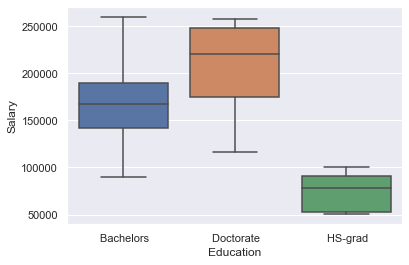

In [41]:
sns.boxplot(x = 'Education', y = 'Salary',data =data)

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

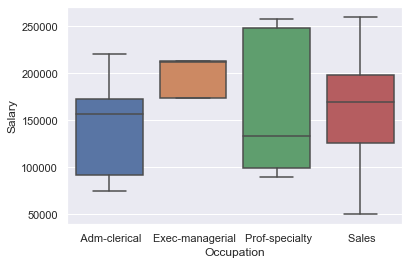

In [42]:
sns.boxplot(x = 'Occupation', y = 'Salary',data =data)

In [31]:
def check(p):
    val = True if p>0.05 else False
    return val

## Hypothesis - Education on Salary

H0  : The mean of Salary variable with respect to each Education level is equal.

H1 : At least one of the means of Salary variable with respect to each Education level is unequal.

In [20]:
formula = 'Salary ~ C(Education)'
model = ols(formula, data).fit()
aov_table_1 = anova_lm(model)

aov_education = pd.DataFrame(aov_table_1)
aov_education['pval > 0.05'] = aov_education['PR(>F)'].apply(check)
aov_education

,df,sum_sq,mean_sq,F,PR(>F),pval > 0.05
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08,False
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN,False


In [35]:
pd.DataFrame(data.groupby('Education')['Salary'].mean(), columns =['Salary'])

,Salary
Education,
Bachelors,165152.933333
Doctorate,208427.000000
HS-grad,75038.777778


Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we reject the Null Hypothesis (H0).

## Hypothesis - Occupation on Salary
H0 : The mean of Salary variable with respect to each Occupation level is equal.

H1 : At least one of the means of Salary variable with respect to each Occupation level is unequal.

In [19]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, data).fit()
aov_table_2 = anova_lm(model)

aov_occu = pd.DataFrame(aov_table_2)
aov_occu['pval > 0.05'] = aov_occu['PR(>F)'].apply(check)
aov_occu

,df,sum_sq,mean_sq,F,PR(>F),pval > 0.05
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508,True
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN,False


Now, we see that the corresponding p-value is greater than alpha (0.05). Thus, we fail to reject the Null Hypothesis (H0).

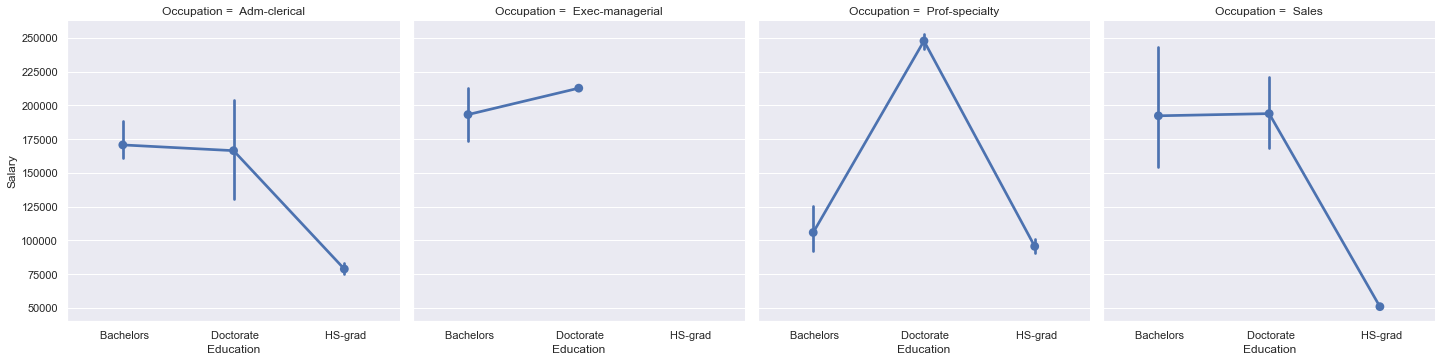

In [45]:
sns.catplot(x = "Education", y = "Salary",
              col='Occupation', data = data,kind = 'point')

In [46]:
data.Occupation.unique()

[' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial']
Categories (4, object): [' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial']

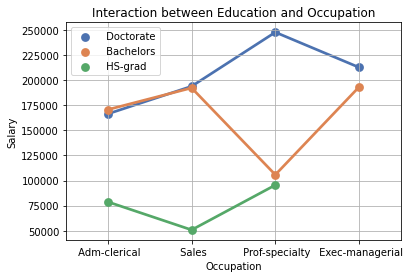

In [5]:
order = [' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial']
sns.pointplot(data = data , x='Occupation',y ='Salary',hue= 'Education',ci=None,palette = sns.color_palette("deep",n_colors=9),order = order)
plt.legend(loc = 'best')
plt.title('Interaction between Education and Occupation')
plt.grid()

In [48]:
pd.crosstab(data['Occupation'],data['Education'],margins=True)

Education,Bachelors,Doctorate,HS-grad,All
Occupation,,,,
Adm-clerical,3,4,3,10
Exec-managerial,4,1,0,5
Prof-specialty,4,6,3,13
Sales,4,5,3,12
All,15,16,9,40


## Hypothesis - Occupation& Education on Salary
H0 : There is no difference in Salary mean for different combination of Education and Occupation 

H1 : At least one of the Salary mean for different combination of Education and Occupation is different.

In [10]:
formula = 'Salary ~ C(Occupation) + C(Education) + C(Occupation):C(Education)'
model = ols(formula, data).fit()
aov_table_3 = anova_lm(model)
aov_edu_occu = pd.DataFrame(aov_table_3)
aov_edu_occu['pval > 0.05'] = aov_edu_occu['PR(>F)'].apply(check)
aov_edu_occu

,df,sum_sq,mean_sq,F,PR(>F),pval > 0.05
C(Occupation),3.0,1.125878e+10,3.752928e+09,5.277862,4.993238e-03,False
C(Education),2.0,9.695663e+10,4.847831e+10,68.176603,1.090908e-11,False
C(Occupation):C(Education),6.0,3.523330e+10,5.872217e+09,8.258287,2.913740e-05,False
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN,False


Now, we see that the p-value for all combination is less than alpha (0.05). Thus, we reject the Null Hypothesis (H0).

# Problem 2

In [3]:
college = pd.read_csv('Education-Post-12th-Standard.csv')
college.head(3)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [6]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [7]:
college.shape

(777, 18)

In [20]:
college.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [9]:
dup = college.duplicated()
dup.sum()

0

In [10]:
college.Names.nunique()

777

In [4]:
df_num = college.drop('Names',axis=1)

In [5]:
sc= StandardScaler()
df_scaled = sc.fit_transform(df_num)
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


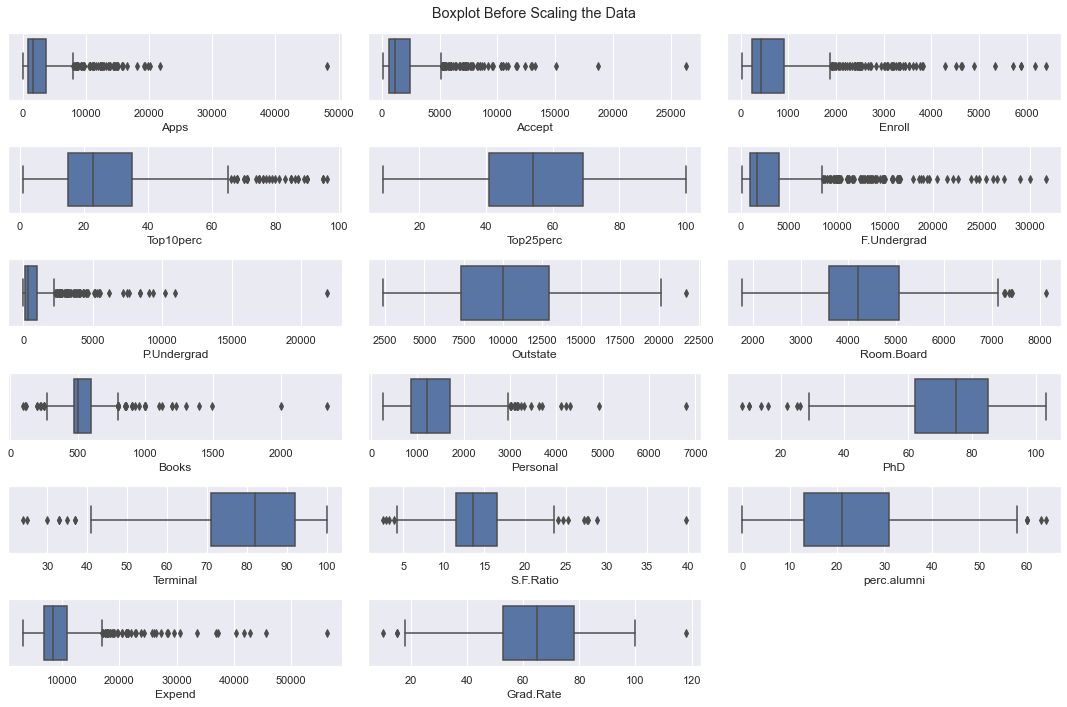

In [26]:
#checking outliers before scaling
fig,ax = plt.subplots(nrows = 6 , ncols = 3, figsize=(15,10))
col = df_num.columns
c=0
k,j=0,0
for i in range(17):
    if j ==3:
        k+=1
        j=0
    sns.boxplot(df_num[col[c]],ax =ax[k][j])
    j+=1
    c+=1
fig.delaxes(ax[5][2])
plt.suptitle('Boxplot Before Scaling the Data')
plt.tight_layout()

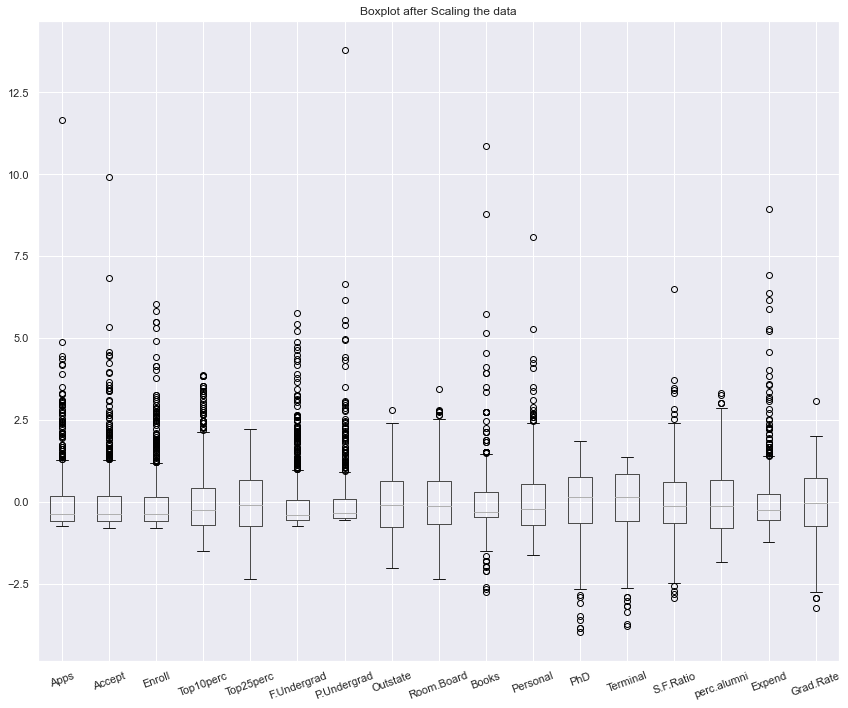

In [27]:
#checking for outliers after scaling

pd.DataFrame(df_scaled,columns = df_num.columns).boxplot(figsize=(12,10))
plt.xticks(rotation = 20)

plt.title('Boxplot after Scaling the data')
plt.tight_layout()

In [8]:
cov_ = np.cov(df_scaled.T)
cov_df = pd.DataFrame(cov_, columns = list(df_num), index =df_num.columns)
np.round(cov_df,3)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001,0.945,0.848,0.339,0.352,0.816,0.399,0.050,0.165,0.133,0.179,0.391,0.370,0.096,-0.090,0.260,0.147
Accept,0.945,1.001,0.913,0.193,0.248,0.875,0.442,-0.026,0.091,0.114,0.201,0.356,0.338,0.176,-0.160,0.125,0.067
Enroll,0.848,0.913,1.001,0.182,0.227,0.966,0.514,-0.156,-0.040,0.113,0.281,0.332,0.309,0.238,-0.181,0.064,-0.022
Top10perc,0.339,0.193,0.182,1.001,0.893,0.141,-0.105,0.563,0.372,0.119,-0.093,0.533,0.492,-0.385,0.456,0.662,0.496
Top25perc,0.352,0.248,0.227,0.893,1.001,0.200,-0.054,0.490,0.332,0.116,-0.081,0.547,0.525,-0.295,0.418,0.528,0.478
F.Undergrad,0.816,0.875,0.966,0.141,0.200,1.001,0.571,-0.216,-0.069,0.116,0.318,0.319,0.300,0.280,-0.230,0.019,-0.079
P.Undergrad,0.399,0.442,0.514,-0.105,-0.054,0.571,1.001,-0.254,-0.061,0.081,0.320,0.149,0.142,0.233,-0.281,-0.084,-0.257
Outstate,0.050,-0.026,-0.156,0.563,0.490,-0.216,-0.254,1.001,0.655,0.039,-0.299,0.383,0.409,-0.556,0.567,0.674,0.572
Room.Board,0.165,0.091,-0.040,0.372,0.332,-0.069,-0.061,0.655,1.001,0.128,-0.200,0.330,0.375,-0.363,0.273,0.502,0.425
Books,0.133,0.114,0.113,0.119,0.116,0.116,0.081,0.039,0.128,1.001,0.180,0.027,0.100,-0.032,-0.040,0.113,0.001


In [7]:
cor = pd.DataFrame(df_scaled, columns = list(df_num), index =df_num.T.columns).corr()
np.round(cor,3)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000,0.943,0.847,0.339,0.352,0.814,0.398,0.050,0.165,0.133,0.179,0.391,0.369,0.096,-0.090,0.260,0.147
Accept,0.943,1.000,0.912,0.192,0.247,0.874,0.441,-0.026,0.091,0.114,0.201,0.356,0.338,0.176,-0.160,0.125,0.067
Enroll,0.847,0.912,1.000,0.181,0.227,0.965,0.513,-0.155,-0.040,0.113,0.281,0.331,0.308,0.237,-0.181,0.064,-0.022
Top10perc,0.339,0.192,0.181,1.000,0.892,0.141,-0.105,0.562,0.371,0.119,-0.093,0.532,0.491,-0.385,0.455,0.661,0.495
Top25perc,0.352,0.247,0.227,0.892,1.000,0.199,-0.054,0.489,0.331,0.116,-0.081,0.546,0.525,-0.295,0.418,0.527,0.477
F.Undergrad,0.814,0.874,0.965,0.141,0.199,1.000,0.571,-0.216,-0.069,0.116,0.317,0.318,0.300,0.280,-0.229,0.019,-0.079
P.Undergrad,0.398,0.441,0.513,-0.105,-0.054,0.571,1.000,-0.254,-0.061,0.081,0.320,0.149,0.142,0.233,-0.281,-0.084,-0.257
Outstate,0.050,-0.026,-0.155,0.562,0.489,-0.216,-0.254,1.000,0.654,0.039,-0.299,0.383,0.408,-0.555,0.566,0.673,0.571
Room.Board,0.165,0.091,-0.040,0.371,0.331,-0.069,-0.061,0.654,1.000,0.128,-0.199,0.329,0.375,-0.363,0.272,0.502,0.425
Books,0.133,0.114,0.113,0.119,0.116,0.116,0.081,0.039,0.128,1.000,0.179,0.027,0.100,-0.032,-0.040,0.112,0.001


In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
  -3.

In [12]:
pca = PCA(n_components = 9)
data_reduced = pca.fit_transform(df_scaled)
data_reduced

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         6.38443468e-01, -8.79386137e-01,  9.30839439e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         2.36753302e-01,  4.69253269e-02,  1.11378046e+00],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.48276091e-01,  3.08740489e-01, -1.05452246e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
        -1.31749158e+00, -1.28288447e-01,  2.12374567e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         8.33276555e-02, -5.52585842e-01,  8.19690348e-02],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
         1.30731260e+00,  6.27409633e-01,  7.23561569e-01]])

In [18]:
df_comp = pd.DataFrame(pca.components_, columns = list(df_num))
np.round(df_comp,3)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.249,0.208,0.176,0.354,0.344,0.155,0.026,0.295,0.249,0.065,-0.043,0.318,0.317,-0.177,0.205,0.319,0.252
1,0.332,0.372,0.404,-0.082,-0.045,0.418,0.315,-0.250,-0.138,0.056,0.220,0.058,0.046,0.247,-0.247,-0.132,-0.169
2,-0.063,-0.101,-0.083,0.035,-0.024,-0.061,0.140,0.047,0.149,0.677,0.500,-0.127,-0.066,-0.290,-0.147,0.227,-0.208
3,0.281,0.268,0.162,-0.052,-0.110,0.100,-0.159,0.131,0.185,0.087,-0.231,-0.535,-0.519,-0.161,0.017,0.079,0.269
4,0.006,0.056,-0.056,-0.395,-0.427,-0.043,0.302,0.223,0.561,-0.127,-0.222,0.140,0.205,-0.079,-0.216,0.076,-0.109
5,-0.016,0.008,-0.043,-0.053,0.033,-0.043,-0.191,-0.030,0.163,0.641,-0.331,0.091,0.155,0.487,-0.047,-0.298,0.216
6,-0.042,-0.013,-0.028,-0.161,-0.118,-0.025,0.061,0.109,0.210,-0.150,0.634,-0.001,-0.028,0.219,0.243,-0.227,0.560
7,-0.103,-0.056,0.059,-0.123,-0.102,0.079,0.571,0.010,-0.221,0.213,-0.233,-0.077,-0.012,-0.084,0.679,-0.054,-0.005
8,-0.090,-0.178,-0.129,0.341,0.404,-0.059,0.561,-0.005,0.275,-0.134,-0.094,-0.185,-0.255,0.275,-0.255,-0.049,0.042


Text(0.5, 1.0, 'Heatmap for factor Analysis')

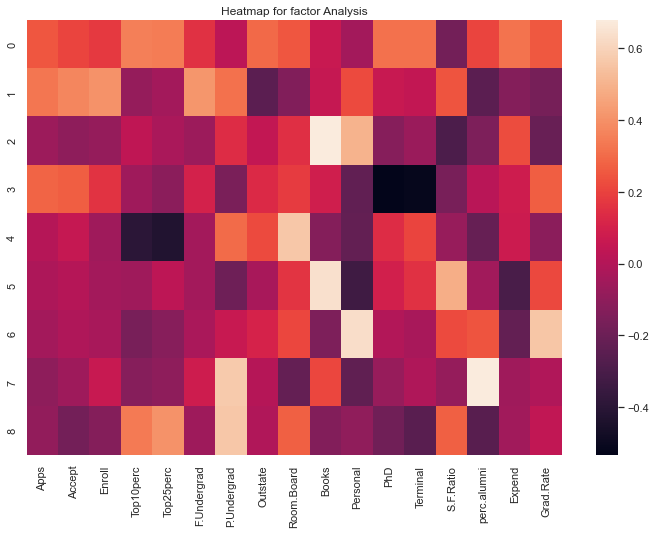

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp)
plt.title('Heatmap for factor Analysis')

In [14]:
for i in range(0,df_num.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_num.columns[i]),end=' + ')

0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

In [15]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


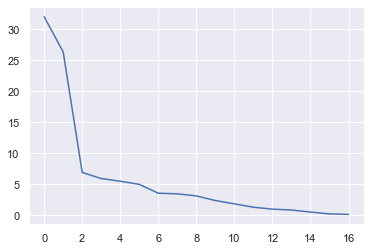

In [16]:
plt.plot(var_exp)

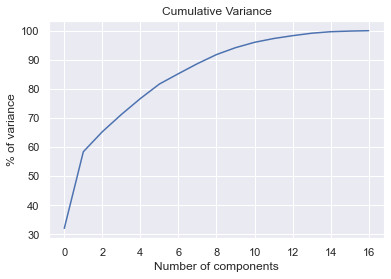

In [17]:
plt.title('Cumulative Variance')
plt.xlabel('Number of components')
plt.ylabel('% of variance')
plt.plot(cum_var_exp)


# Univariate Analysis

In [27]:
college.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

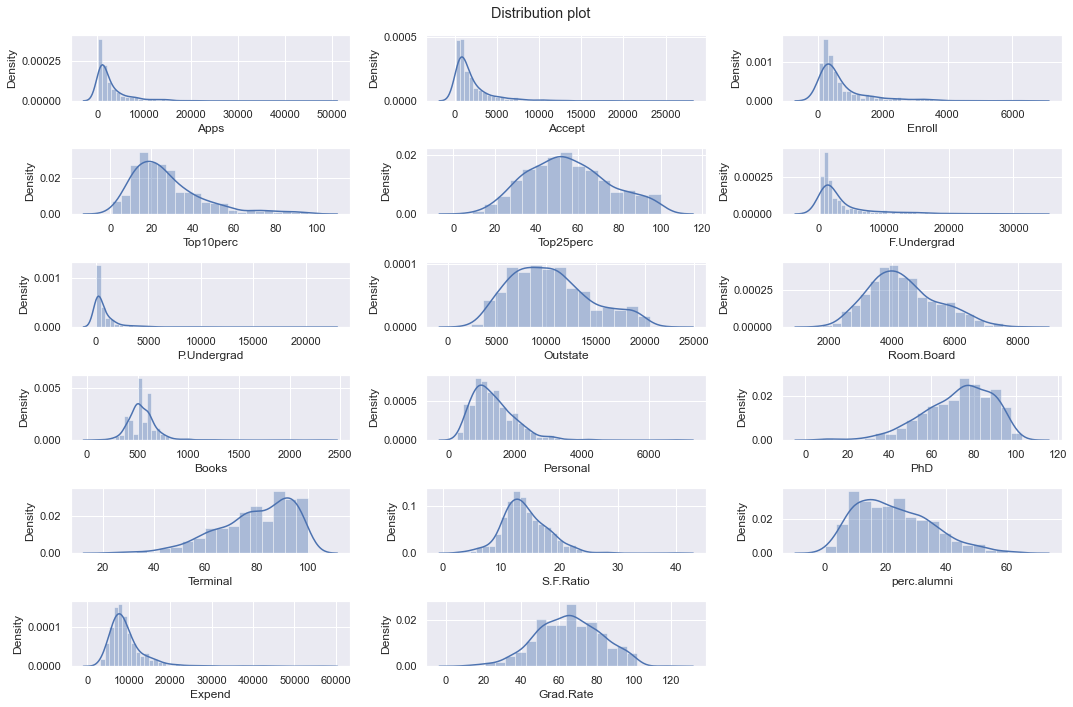

In [32]:
fig,ax = plt.subplots(nrows = 6 , ncols = 3, figsize=(15,10))
col = df_num.columns
c=0
k,j=0,0
for i in range(17):
    if j ==3:
        k+=1
        j=0
    sns.distplot(df_num[col[c]],ax =ax[k][j],kde =True)
    j+=1
    c+=1
fig.delaxes(ax[5][2])
plt.suptitle('Distribution plot')
plt.tight_layout()

In [35]:
df_temp = college.sort_values(by = 'Grad.Rate',ascending=False).head(15)
df_temp

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
668,University of Richmond,5892,2718,756,46,72,2854,594,14500,3285,700,1125,75,89,11.7,32,11984,100
16,Amherst College,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
238,Grove City College,2491,1110,573,57,88,2213,35,5224,3048,525,350,65,65,18.4,18,4957,100
250,Harvard University,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
251,Harvey Mudd College,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.2,46,21569,100
126,College of Mount St. Joseph,798,620,238,14,41,1165,1232,9800,4430,400,1150,46,46,11.1,35,6889,100
317,Lindenwood College,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
377,Missouri Southern State College,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100
522,Siena College,2961,1932,628,24,68,2669,616,10800,5100,575,1090,71,82,14.1,42,8189,100


In [36]:
college['Grad.Rate'].describe()

count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64

In [39]:
college[['PhD','Terminal']].describe()

,PhD,Terminal
count,777.000000,777.000000
mean,72.660232,79.702703
std,16.328155,14.722359
min,8.000000,24.000000
25%,62.000000,71.000000
50%,75.000000,82.000000
75%,85.000000,92.000000
max,103.000000,100.000000


<AxesSubplot:xlabel='PhD', ylabel='Grad.Rate'>

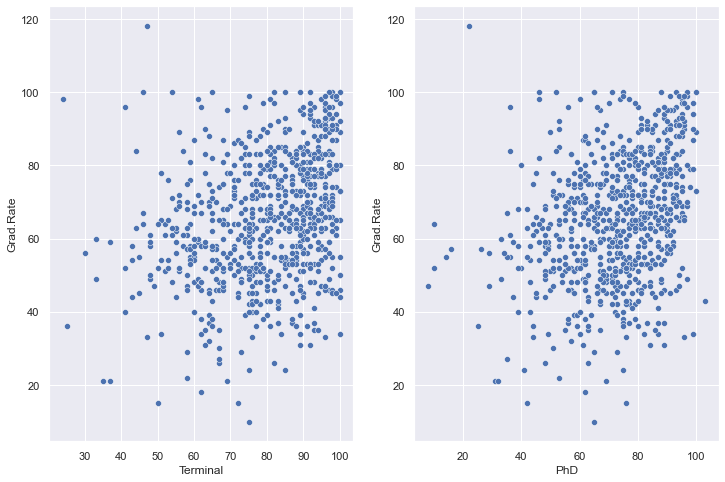

In [57]:
fig,ax1 = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
sns.scatterplot(college['Terminal'],college['Grad.Rate'],ax= ax1[0])
sns.scatterplot(college['PhD'],college['Grad.Rate'],ax = ax1[1])

In [58]:
c = college[['PhD','Terminal','Grad.Rate']].corr()
c

,PhD,Terminal,Grad.Rate
PhD,1.000000,0.849587,0.305038
Terminal,0.849587,1.000000,0.289527
Grad.Rate,0.305038,0.289527,1.000000


In [82]:
college[['Personal','Expend','Books','Room.Board']].describe()

,Personal,Expend,Books,Room.Board
count,777.000000,777.000000,777.000000,777.000000
mean,1340.642214,9660.171171,549.380952,4357.526384
std,677.071454,5221.768440,165.105360,1096.696416
min,250.000000,3186.000000,96.000000,1780.000000
25%,850.000000,6751.000000,470.000000,3597.000000
50%,1200.000000,8377.000000,500.000000,4200.000000
75%,1700.000000,10830.000000,600.000000,5050.000000
max,6800.000000,56233.000000,2340.000000,8124.000000


<AxesSubplot:title={'center':'5 University where Personal Expenditure is lowest'}, xlabel='Names', ylabel='Personal'>

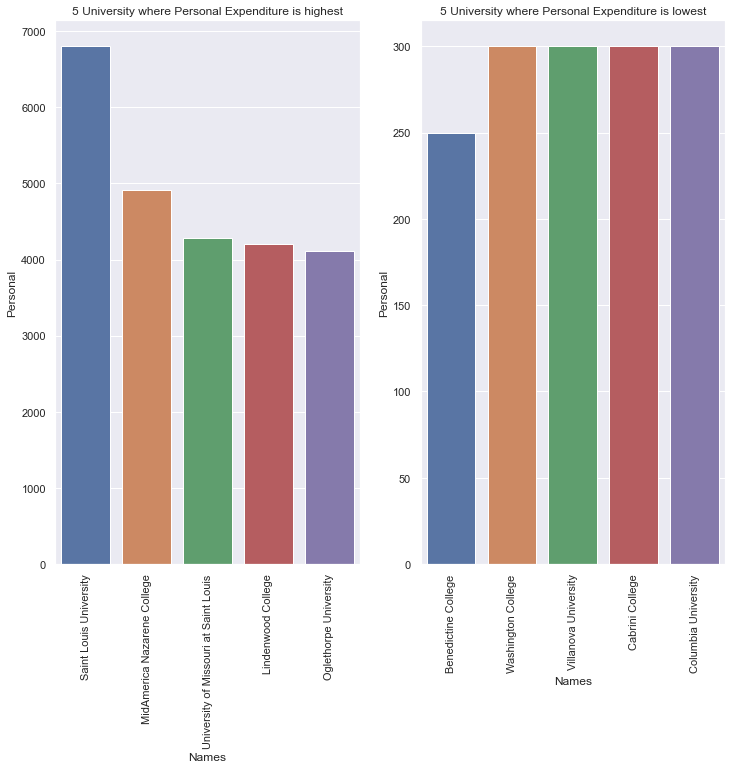

In [19]:
df_per1 = college.sort_values(by='Personal',ascending = False).head(5)
df_per2 = college.sort_values(by='Personal',ascending = True).head(5)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,10))
ax[0].set_xticklabels(df_per1['Names'],rotation=90)
ax[0].set_title('5 University where Personal Expenditure is highest')
sns.barplot(data=df_per1, x='Names',y='Personal',ax = ax[0])

ax[1].set_xticklabels(df_per2['Names'],rotation=90)
ax[1].set_title('5 University where Personal Expenditure is lowest')
sns.barplot(data=df_per2, x='Names',y='Personal',ax = ax[1])


<AxesSubplot:title={'center':'5 University where Instrument Expend is lowest'}, xlabel='Names', ylabel='Expend'>

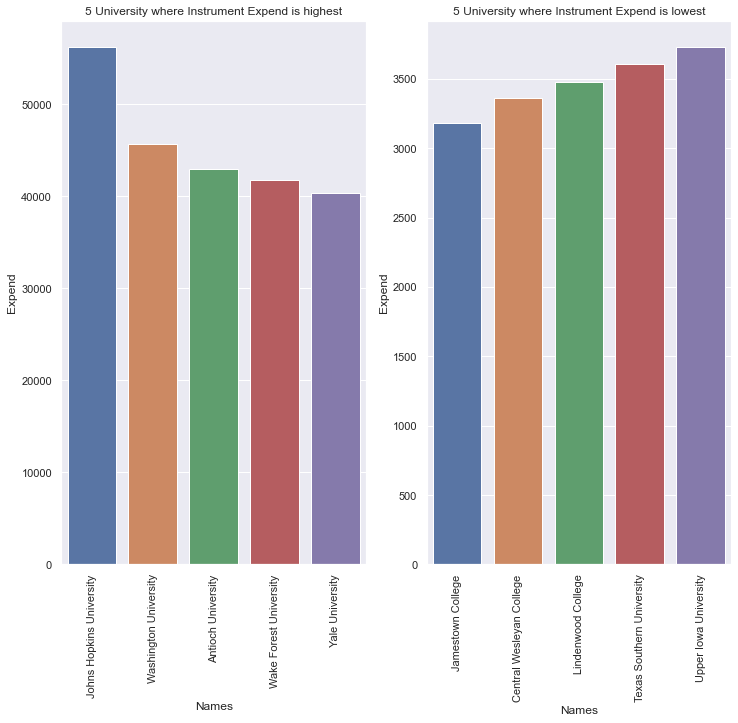

In [81]:
df_exp1 = college.sort_values(by='Expend',ascending = False).head(5)
df_exp2 = college.sort_values(by='Expend',ascending = True).head(5)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,10))
ax[0].set_xticklabels(df_exp1['Names'],rotation=90)
ax[0].set_title('5 University where Instrument Expend is highest')
sns.barplot(data=df_exp1, x='Names',y='Expend',ax = ax[0])

ax[1].set_xticklabels(df_exp2['Names'],rotation=90)
ax[1].set_title('5 University where Instrument Expend is lowest')
sns.barplot(data=df_exp2, x='Names',y='Expend',ax = ax[1])

In [83]:
college.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [84]:
college[['F.Undergrad','P.Undergrad']].describe()

,F.Undergrad,P.Undergrad
count,777.000000,777.000000
mean,3699.907336,855.298584
std,4850.420531,1522.431887
min,139.000000,1.000000
25%,992.000000,95.000000
50%,1707.000000,353.000000
75%,4005.000000,967.000000
max,31643.000000,21836.000000


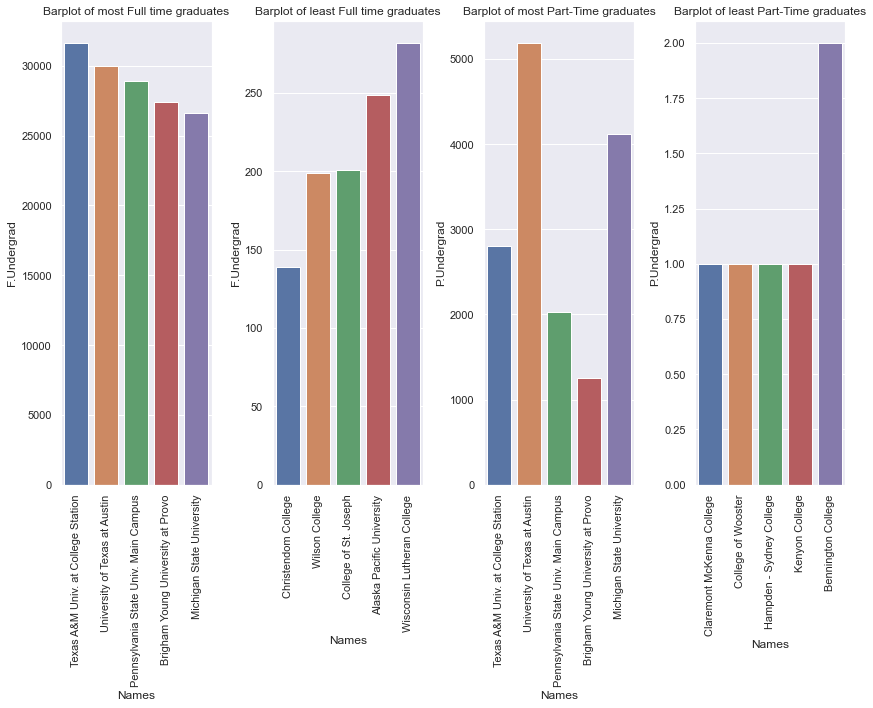

In [96]:
df_f1 = college.sort_values(by='F.Undergrad',ascending = False).head(5)
df_f2 = college.sort_values(by='F.Undergrad',ascending = True).head(5)
df_p1 = college.sort_values(by='F.Undergrad',ascending = False).head(5)
df_p2 = college.sort_values(by='P.Undergrad',ascending = True).head(5)

fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(12,10))
ax[0].set_xticklabels(df_f1['Names'],rotation=90)
ax[0].set_title('Barplot of most Full time graduates')
sns.barplot(data=df_f1, x='Names',y='F.Undergrad',ax = ax[0])

ax[1].set_xticklabels(df_f2['Names'],rotation=90)
ax[1].set_title('Barplot of least Full time graduates')
sns.barplot(data=df_f2, x='Names',y='F.Undergrad',ax = ax[1])

ax[2].set_xticklabels(df_p1['Names'],rotation=90)
ax[2].set_title('Barplot of most Part-Time graduates')
sns.barplot(data=df_p1, x='Names',y='P.Undergrad',ax = ax[2])

ax[3].set_xticklabels(df_p2['Names'],rotation=90)
ax[3].set_title('Barplot of least Part-Time graduates')
sns.barplot(data=df_p2, x='Names',y='P.Undergrad',ax = ax[3])

plt.tight_layout()

<AxesSubplot:title={'center':'Universities with least outstate students'}, xlabel='Names', ylabel='P.Undergrad'>

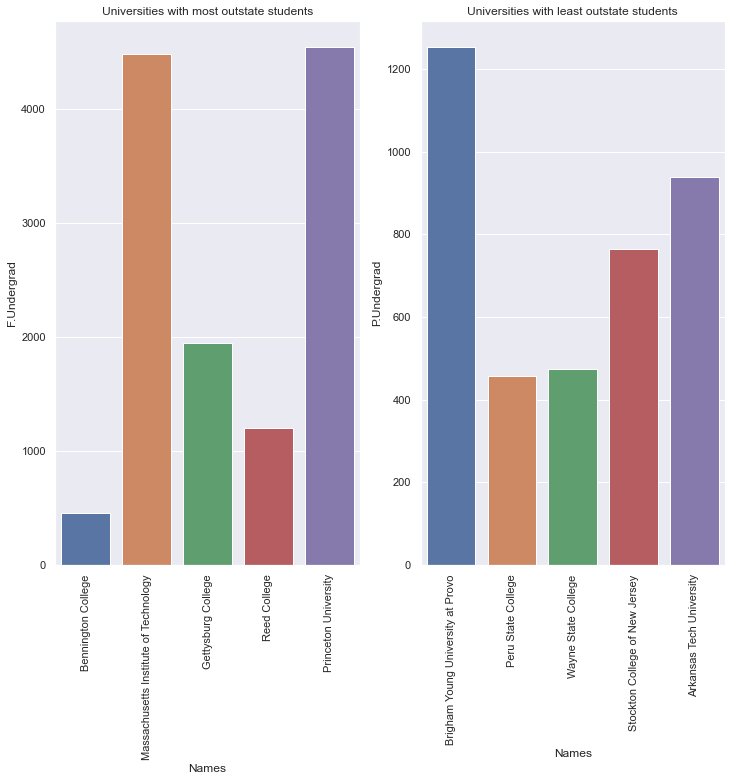

In [98]:
df_out1 = college.sort_values(by='Outstate',ascending = False).head(5)
df_out2 = college.sort_values(by='Outstate',ascending = True).head(5)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,10))
ax[0].set_xticklabels(df_out1['Names'],rotation=90)
ax[0].set_title('Universities with most outstate students')
sns.barplot(data=df_out1, x='Names',y='F.Undergrad',ax = ax[0])

ax[1].set_xticklabels(df_out2['Names'],rotation=90)
ax[1].set_title('Universities with least outstate students')
sns.barplot(data=df_out2, x='Names',y='P.Undergrad',ax = ax[1])

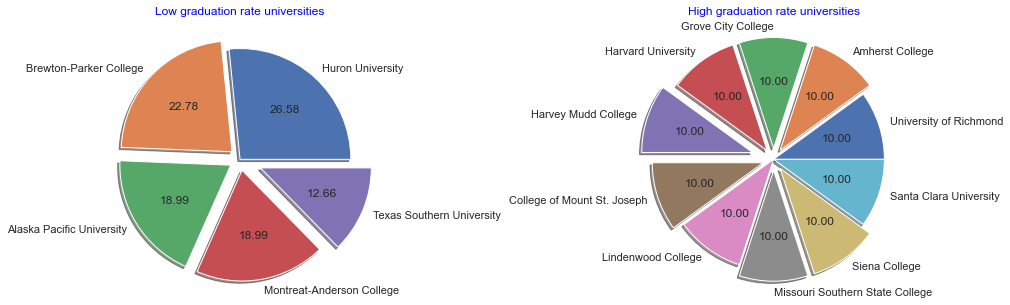

In [142]:
df_grad = college.sort_values(by='Grad.Rate',ascending = False)
grad_top = df_grad[df_grad['Grad.Rate']==100]
grad_bottom = df_grad.tail(5)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,12))
ax[0].pie(grad_bottom['Grad.Rate'] , labels =grad_bottom['Names'],shadow=True,explode = (0.0,0.1,0.1,0.1,0.2),autopct='%.2f')
ax[0].set_title('Low graduation rate universities',color = 'blue')

explode = (0.0,0.1,0.1,0.1,0.2,0.1,0.0,0.1,0.1,0.0)
ax[1].pie(grad_top['Grad.Rate'] , labels =grad_top['Names'],shadow=True,explode = explode,autopct='%.2f')
ax[1].set_title('High graduation rate universities',color = 'blue')

plt.tight_layout()

In [129]:
df_rate = college[['Names','Accept','Apps','Enroll','Grad.Rate']].copy()
df_rate['acc_rate'] = np.round(df_rate['Accept']/df_rate['Apps'],2)
df_rate['enroll_rate'] = np.round(df_rate['Enroll']/df_rate['Accept'],2)

df_rate

,Names,Accept,Apps,Enroll,Grad.Rate,acc_rate,enroll_rate
0,Abilene Christian University,1232,1660,721,60,0.74,0.59
1,Adelphi University,1924,2186,512,56,0.88,0.27
2,Adrian College,1097,1428,336,54,0.77,0.31
3,Agnes Scott College,349,417,137,59,0.84,0.39
4,Alaska Pacific University,146,193,55,15,0.76,0.38
...,...,...,...,...,...,...,...
772,Worcester State College,1515,2197,543,40,0.69,0.36
773,Xavier University,1805,1959,695,83,0.92,0.39
774,Xavier University of Louisiana,1915,2097,695,49,0.91,0.36
775,Yale University,2453,10705,1317,99,0.23,0.54


In [146]:
college[['Top10perc','Top25perc','S.F.Ratio','perc.alumni']].describe()

,Top10perc,Top25perc,S.F.Ratio,perc.alumni
count,777.000000,777.000000,777.000000,777.000000
mean,27.558559,55.796654,14.089704,22.743887
std,17.640364,19.804778,3.958349,12.391801
min,1.000000,9.000000,2.500000,0.000000
25%,15.000000,41.000000,11.500000,13.000000
50%,23.000000,54.000000,13.600000,21.000000
75%,35.000000,69.000000,16.500000,31.000000
max,96.000000,100.000000,39.800000,64.000000


In [139]:
corr = college.select_dtypes(include=['int64','Float64']).corr()
corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


Text(0.5, 1.0, 'Correlation Heatmap')

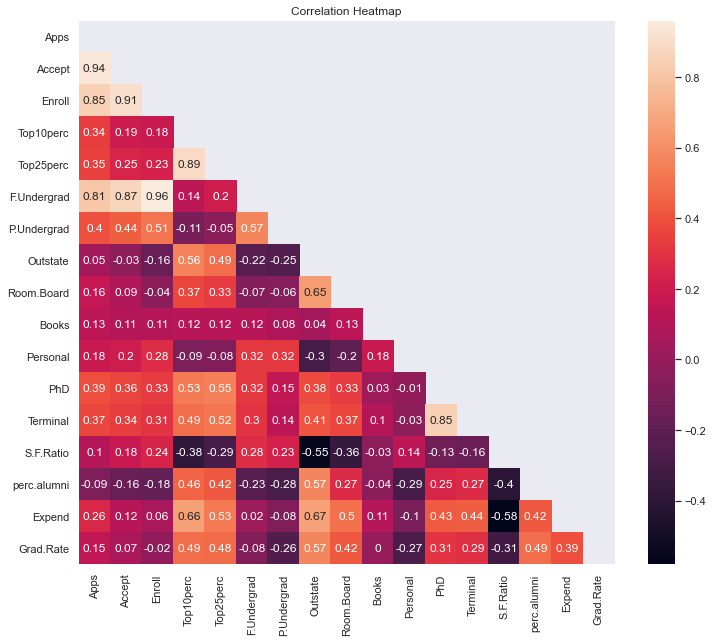

In [143]:
plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)
plt.title('Correlation Heatmap')


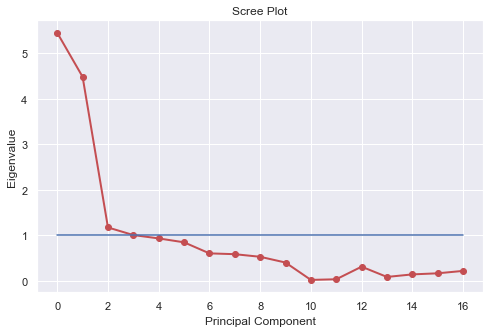

In [26]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(df_num.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.plot(range(0,17),np.ones(17))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()